In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Section a: Data Loading and Preprocessing**

In [56]:
df = pd.read_csv('mid_term_dataset.csv')
df.head()

,Feature1,Feature2,Feature3,Feature4,Class
0,5.149014,3.458521,1.694307,0.656909,A
1,4.929754,3.429759,1.973764,0.430230,A
2,4.859158,3.662768,1.360975,0.060281,A
3,5.072589,2.926016,0.982525,0.031314,A
4,4.696151,3.594274,1.227593,-0.223691,A


In [57]:
print("Total records: ", df.shape)
print("Total features: " ,df.shape)

Total records:  (200, 5)
Total features:  (200, 5)


class distribution for the binary target column

In [58]:
df["Class"].value_counts()

,count
Class,
A,100
B,100


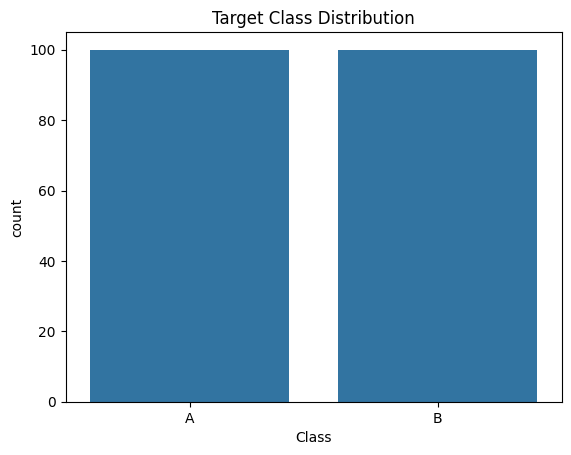

In [59]:
# Bar chart for class distribution
target_col = "Class"
sns.countplot(x=target_col, data=df)
plt.title("Target Class Distribution")
plt.show()


Normalize or scale the features

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
X = df.drop(columns=target_col)
y = df[target_col]

# **Section b:Define a feedforward neural network**

In [62]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [63]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_scaled.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Print model summary
print("\nModel Summary:")
model.summary()


Model Summary:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225 (900.00 B)

 Trainable params: 225 (900.00 B)

 Non-trainable params: 0 (0.00 B)

# **Section c: Model Compilation and Training**

Splitting the data

In [64]:
df["Class"] = df["Class"].fillna("A")
df["Class"] = df["Class"].map({"A": 0, "B": 1})

X = df.drop(columns="Class")
y = df["Class"]

# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [67]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [68]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.6807 - loss: 0.7406 - val_accuracy: 0.5625 - val_loss: 0.7675
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8159 - loss: 0.6595 - val_accuracy: 0.6250 - val_loss: 0.7074
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8866 - loss: 0.6137 - val_accuracy: 0.7500 - val_loss: 0.6549
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9553 - loss: 0.5701 - val_accuracy: 0.7812 - val_loss: 0.6081
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9813 - loss: 0.5295 - val_accuracy: 0.8750 - val_loss: 0.5686
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9860 - loss: 0.4959 - val_accuracy: 0.9062 - val_loss: 0.5322
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9744 - loss: 0.4740 - val_accuracy: 0.9062 - val_loss: 0.4971
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9961 - loss: 0.4239 - val_accuracy: 0.9062 - val_loss: 0.4634


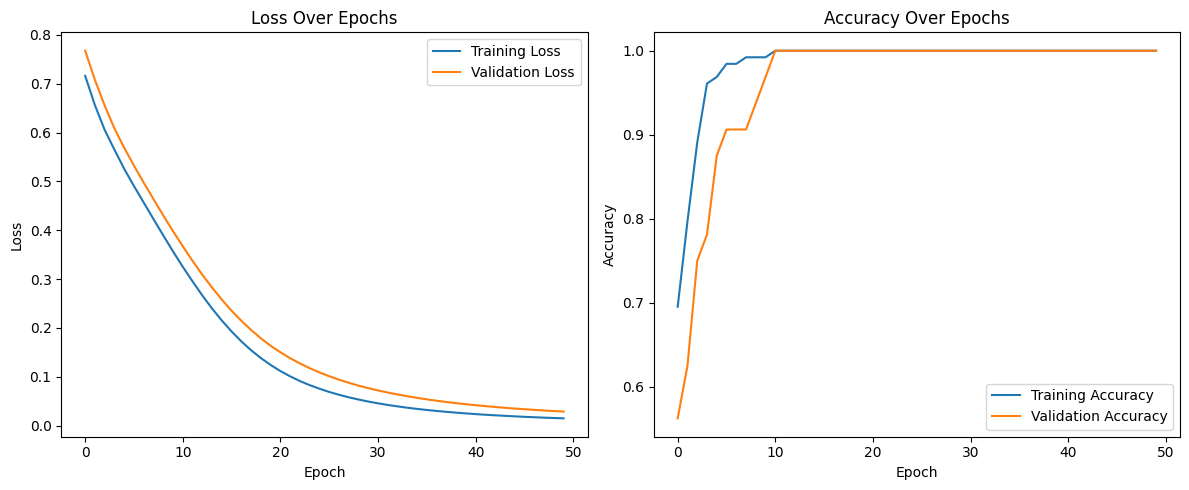

In [69]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# **Section d: Model Evaluation and Prediction**

In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

Predict on test data

In [71]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Accuracy,Precision,Recall,F1-Score

In [72]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [74]:
print("Test Accuracy: " , acc)
print("Precision: ", prec)
print("Recall: ", rec)
print("F1 Score: ", f1)

Test Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0


Confusion matrix

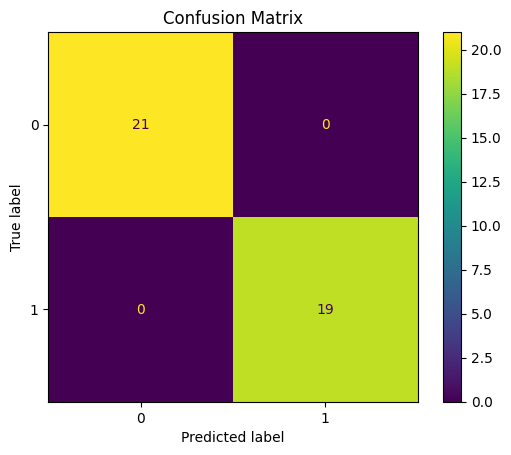

In [75]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title("Confusion Matrix")
plt.show()

# **Section e: Result Discussion and Interpretation**

**Discussion:**
- From the training and validation plots, we can observe the behavior of the model over epochs.
If training accuracy is high but validation accuracy is low, it may suggest overfitting.
- The class distribution may show imbalance. If one class significantly outweighs the other, performance metrics such as precision and recall become more than accuracy.
- The confusion matrix helps us visualize true positives, false positives, etc., which provides insights into the model's effectiveness. A balanced matrix indicates good performance across both classes.